### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

<div class="alert alert-block alert-info"; style="border-left: 7px solid blue">
<b> Привет! 👋</b>

</div>

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [338]:
# импорт библиотек для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display_html 
from datetime import datetime, timedelta

In [339]:
# загрузка данных с переменные
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

In [340]:
# знакомство с данными
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Описание данных**

В нашем распоряжении три датасета.


In [341]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


**1.** Таблица `visits` хранит лог сервера с информацией о посещениях сайта (6 столбцов и 309901 строка, типы данных по столбцам: int64(1), object(5)):
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

In [342]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


**2.**  Таблица `orders` — информацию о покупках (3 столбца и 40212 строк, типы данных по столбцам: float64(1), int64(1), object(1)):
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

In [343]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**3.** Таблица `costs` — информацию о расходах на рекламу (30 столбца и 1800 строк, типы данных по столбцам:  float64(1), object(2)):
* `Channel` — идентификатор рекламного источника,
* `Dt` — дата проведения рекламной кампании,
* `Costs` — расходы на эту кампанию.

Пропущенных значений в таблицах нет.

Все названия столбцов нужно привести к одному регистру и общему стилю.

Также в таблицах есть столбцы, содержащие данные о датах и времени покупки, проведения рекламной компании, начала/окончаниея сессии, но тип данных `object`, заменим его на `datetime`.

In [344]:
# приведение столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [345]:
# переименование столбцов
visits = visits.rename(
    columns={
        'user id': 'user_id',
        'session start': 'session_start',
        'session end': 'session_end'
    }
)
orders = orders.rename(
    columns={
        'user id': 'user_id',
        'event dt': 'event_dt'
    }
)

In [346]:
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [347]:
#приведение значений в котегориальных столбцах к общему регистру для проверки на дубликаты
list = ['region', 'device', 'channel']
for col in visits:
    if col in list:
        visits[col] = visits[col].str.lower()

costs['channel'] = costs['channel'].str.lower()

In [348]:
#проверка на дубликаты
print(visits.duplicated().sum())
print(costs.duplicated().sum())
orders.duplicated().sum()

0
0


0

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

**2.1. Пользовательский профиль**

In [349]:
# функция для создания пользовательских профилей
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt']  = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей (проверка, есть ли id пользователей из profiles в orders)
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    # объединяем траты на рекламу и число привлечённых пользователей по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей результаты сохраним в столбец acq_cost (CAC)
    costs['acq_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acq_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # органические пользователи не связаны с данными о рекламе, поэтому в столбце acq_cost
    # у них значения NaN заменим их на ноль, ведь стоимость привлечения равна нулю
    
    profiles['acq_cost'] = profiles['acq_cost'].fillna(0)
    
    # возвращаем профили с CAC
    return profiles

**2.2. Retention Rate**

In [350]:
# функция для расчета удержания
def get_retention(profiles, sessions, observ_date, horizon_days, ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observ_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observ_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = profiles.merge(
    visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
    result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]
    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

**2.3. Conversion Rate**

In [351]:
# функция для расчета конверсии
def get_conversion(profiles, orders, observ_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observ_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observn_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # находим дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # строим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # разделим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time  

**2.4. LTV, CAC, ROI**

In [366]:
def get_ltv_roi(profiles, orders, observ_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observ_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observ_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, добавив параметры из dimensions
        cac = df[['user_id', 'acq_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acq_cost': 'mean'})
            .rename(columns={'acq_cost': 'cac'})
        )
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return (result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time)

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
1. Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
2. Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
3. По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [353]:
# строим профили
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acq_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [354]:
# определяем минимальную и максимальную дату привлечения пользователей
max_dt = profiles['dt'].max()
min_dt = profiles['dt'].min()
min_dt, max_dt

(Timestamp('2019-05-01 00:00:00'), Timestamp('2019-10-27 00:00:00'))

In [355]:
# какие страны дают больше всего платящих пользователей
group_by_region = (
    profiles.query('payer == True').groupby('region').agg({'user_id': 'nunique'})
    .merge(profiles.groupby('region').agg({'user_id': 'nunique'}), on='region')
    .rename(columns={'user_id_x': 'paying_users',
                    'user_id_y': 'all_users'})
    .sort_values(by='paying_users', ascending=False)
    .reset_index()
)
group_by_region_styler = (group_by_region.style
                          .set_table_attributes("style='display:inline'").set_caption('Пользователи по странам'))
# c каких устройств чаще всего заходят платящие пользователи
group_by_device = (
    profiles.query('payer == True').groupby('device').agg({'user_id': 'nunique'})
    .merge(profiles.groupby('device').agg({'user_id': 'nunique'}), on='device')
    .rename(columns={'user_id_x': 'paying_users',
                    'user_id_y': 'all_users'})
    .sort_values(by='paying_users', ascending=False)
    .reset_index()
)
group_by_device_styler = (group_by_device.style
                          .set_table_attributes("style='display:inline'").set_caption('Пользователи по устройствам'))
# какие каналы приносят больше всего платящих пользователей
group_by_channel = (
    profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'})
    .merge(profiles.groupby('channel').agg({'user_id': 'nunique'}), on='channel')
    .rename(columns={'user_id_x': 'paying_users',
                    'user_id_y': 'all_users'})
    .sort_values(by='paying_users', ascending=False)
    .reset_index()
)

group_by_channel_styler = (group_by_channel.style
                           .set_table_attributes("style='display:inline'").set_caption('Пользователи по каналам'))

display_html(group_by_region_styler._repr_html_()+group_by_device_styler._repr_html_()
             +group_by_channel_styler._repr_html_(), raw=True)

,region,paying_users,all_users
0,united states,6902,100002
1,uk,700,17575
2,france,663,17450
3,germany,616,14981
,device,paying_users,all_users
0,iphone,3382,54479
1,android,2050,35032
2,mac,1912,30042
3,pc,1537,30455
,channel,paying_users,all_users


<div style="border:solid green 1px; padding: 10px">
    
1. Посететители приходят к нам из:
* США
* Франции
* Германии
* Великобритании.

Больше всего платящих пользователей из `США` (6902 человека), а меньше всего из `Германии` (616 человек).

2. Наши пользователи используют следующие устройства:
* Mac
* IPhone
* PC
* Android

Больше всего платящих пользователей заходят с `IPhone` (3382 человека), а меньше всего c `PC` (1537 человек).

3. Каналы привлечения пользователей:

* Faceboom
* Organic
* Adnonsense
* Yrabbit
* Mediatornado
* Rocketsuperads
* Leapbob
* Tiptop
* Wahoonetbanner
* Opplecreativemedia
* Lambdamediaads

Больше всего платящих пользователей пришло по каналу `Faceboom` (3557 человек), а меньше всего по `Mediatornado` (156 человек).

# Шаг 4. Маркетинг

Выясните:
1. Сколько денег потратили? Всего / на каждый источник / по времени.
2. Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Общая сумма расходов: 105497.3


,channel,costs
0,tiptop,54751.300000
1,faceboom,32445.600000
2,wahoonetbanner,5151.000000
3,adnonsense,3911.250000
4,opplecreativemedia,2151.250000
5,rocketsuperads,1833.000000
6,leapbob,1797.600000
7,lambdamediaads,1557.600000
8,mediatornado,954.480000
9,yrabbit,944.220000


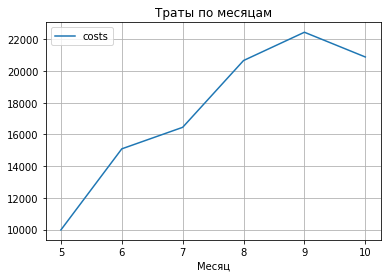

In [356]:
#общая сумма расходов на маркетинг
print('Общая сумма расходов:', round(costs['costs'].sum(), 2))

# как траты распределены по источникам
costs_by_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()

costs_by_channel_styler = (costs_by_channel.style
                           .set_table_attributes("style='display:inline'").set_caption('Траты по каналам'))
# как траты распределены по времени (месяцам)
costs['month'] = costs['dt'].dt.month
costs_by_month = costs.groupby('month').agg({'costs': 'sum'}).reset_index()

costs_by_month_styler = (costs_by_month.style
                           .set_table_attributes("style='display:inline'").set_caption('Траты по месяцам'))

display_html(costs_by_channel_styler._repr_html_()+costs_by_month_styler._repr_html_(), raw=True)

# построим график изменений трат по времени
costs.groupby('month').agg({'costs': 'sum'}).plot(grid=True)
plt.xlabel('Месяц')
plt.title('Траты по месяцам')
plt.show() 

<div style="border:solid green 1px; padding: 10px">
    
1. Всего потратили 105 497,30. Из них больше всего на канал `TipTop` - 54 751,30, а меньше всего на канал `Yrabbit` - 944,22. Самым затратным вышел сентябрь, почти 22,5 тысячи и меньше всего потратили в мае - около 10 тысяч. Распределение затрат по месяцам наглядно видно на графике `Траты по месяцам`.

2. Выясним, как меняется стоимость привлечения для каждого источника трафика используя профили пользователей. В профилях есть столбец `acq_cost` со стоимостью привлечения каждого посетителя по дате и источнику привлечения. Построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построим по ней график истории изменений.

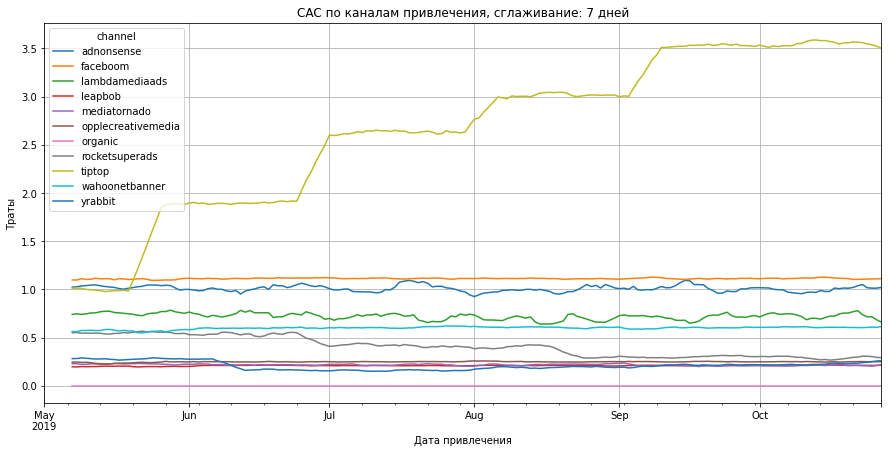

In [357]:
# строим график истории изменений CAC по каналам привлечения c окном сглаживания в 6 дней
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

report = profiles.pivot_table(index='dt', columns='channel', values='acq_cost', aggfunc='mean')
window = 7
filter_data(report, window).plot(grid = True, figsize=(15, 7))
plt.title('CAC по каналам привлечения, сглаживание: {} дней'.format(window))
plt.ylabel('Траты')
plt.xlabel('Дата привлечения')
plt.show()

In [358]:
# группируем траты по каналам без tiptop
csts_by_chnl_styler = ((
    profiles.query('channel != "tiptop"').groupby(['channel']).agg({'acq_cost': 'mean'})
    .sort_values(by='acq_cost', ascending=False).reset_index())
    .style.set_table_attributes("style='display:inline'").set_caption('Траты по каналам, без ТipТop'))

# группируем траты по каналу tiptop помесячно
csts_tiptop_styler = ((
    profiles.query('channel == "tiptop"').groupby(['month'])
    .agg({'acq_cost': 'mean'}).sort_values(by='acq_cost', ascending=False).reset_index())
    .style.set_table_attributes("style='display:inline'").set_caption('Траты на TipTop по месяцам'))

display_html(csts_by_chnl_styler._repr_html_()+csts_tiptop_styler._repr_html_(), raw=True)

,channel,acq_cost
0,faceboom,1.113286
1,adnonsense,1.008054
2,lambdamediaads,0.724802
3,wahoonetbanner,0.602245
4,rocketsuperads,0.412095
5,opplecreativemedia,0.250000
6,yrabbit,0.218975
7,mediatornado,0.218717
8,leapbob,0.210172
9,organic,0.000000


<div style="border:solid green 1px; padding: 10px">
    
Стоимость привлечения «органических» пользователей равна нулю, потому что они "пришли" к нам самостоятельно, а не благодаря рекламе. Траты на привлечение одного пользователя по всем каналам стабильны, кроме `TipTop`, затраты на который "скачут" от месяца к месяцу довольно резко на увеличение (от ≈ 1.35 в мае до ≈ 3.55 в октябре), также нужно обратить внимание, `TipTop` на втором месте по количеству пришедших польхователей в целом и платящих в т.ч. Самое дешовое привлечение обходится компании в среднем в ≈ 0.21 (канал `Leapbob`), а самое дорогое, не считая `TipTop`, в ≈ 1.11 (из `Faceboom`, который, как раз, лидер по приходу пользователей, в т.ч. платящих). 

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

С помощью LTV и ROI:

1. Проанализируйте общую окупаемость рекламы.
2. Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.
3. Проанализируйте окупаемость рекламы с разбивкой по странам. 
4. Проанализируйте окупаемость рекламы с разбивкой по устройствам.

Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI для всех пунктов выше.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.


**5.1. Проанализируйте общую окупаемость рекламы**

In [362]:
# считаем LTV и ROI LTV и ROI, CAC
observ_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

get_ltv_roi(profiles, orders, observ_date, horizon_days)

TypeError: 'list' object is not callable

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

### Проанализируйте окупаемость рекламы с разбивкой по странам

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.